In [1]:
# This is needed to fastly reload features

%load_ext autoreload
%autoreload 2

In [17]:
import os
import numpy as np
import imageio
import sys

from nilearn.image import resample_to_img
import nibabel

from gliomi import *

In [18]:
# Subject dir
subjects_dir = f"/data/RMN/LUCA_PASQUINI/DATI_SEGMENTATI_SCALATI_media"

# Subject set to load
dataset_labels = "datasets/dataset-survivor.csv"

# Check data

We verify here if tumor is correctly placed plotting the brain in slices and applying on top of it the mask

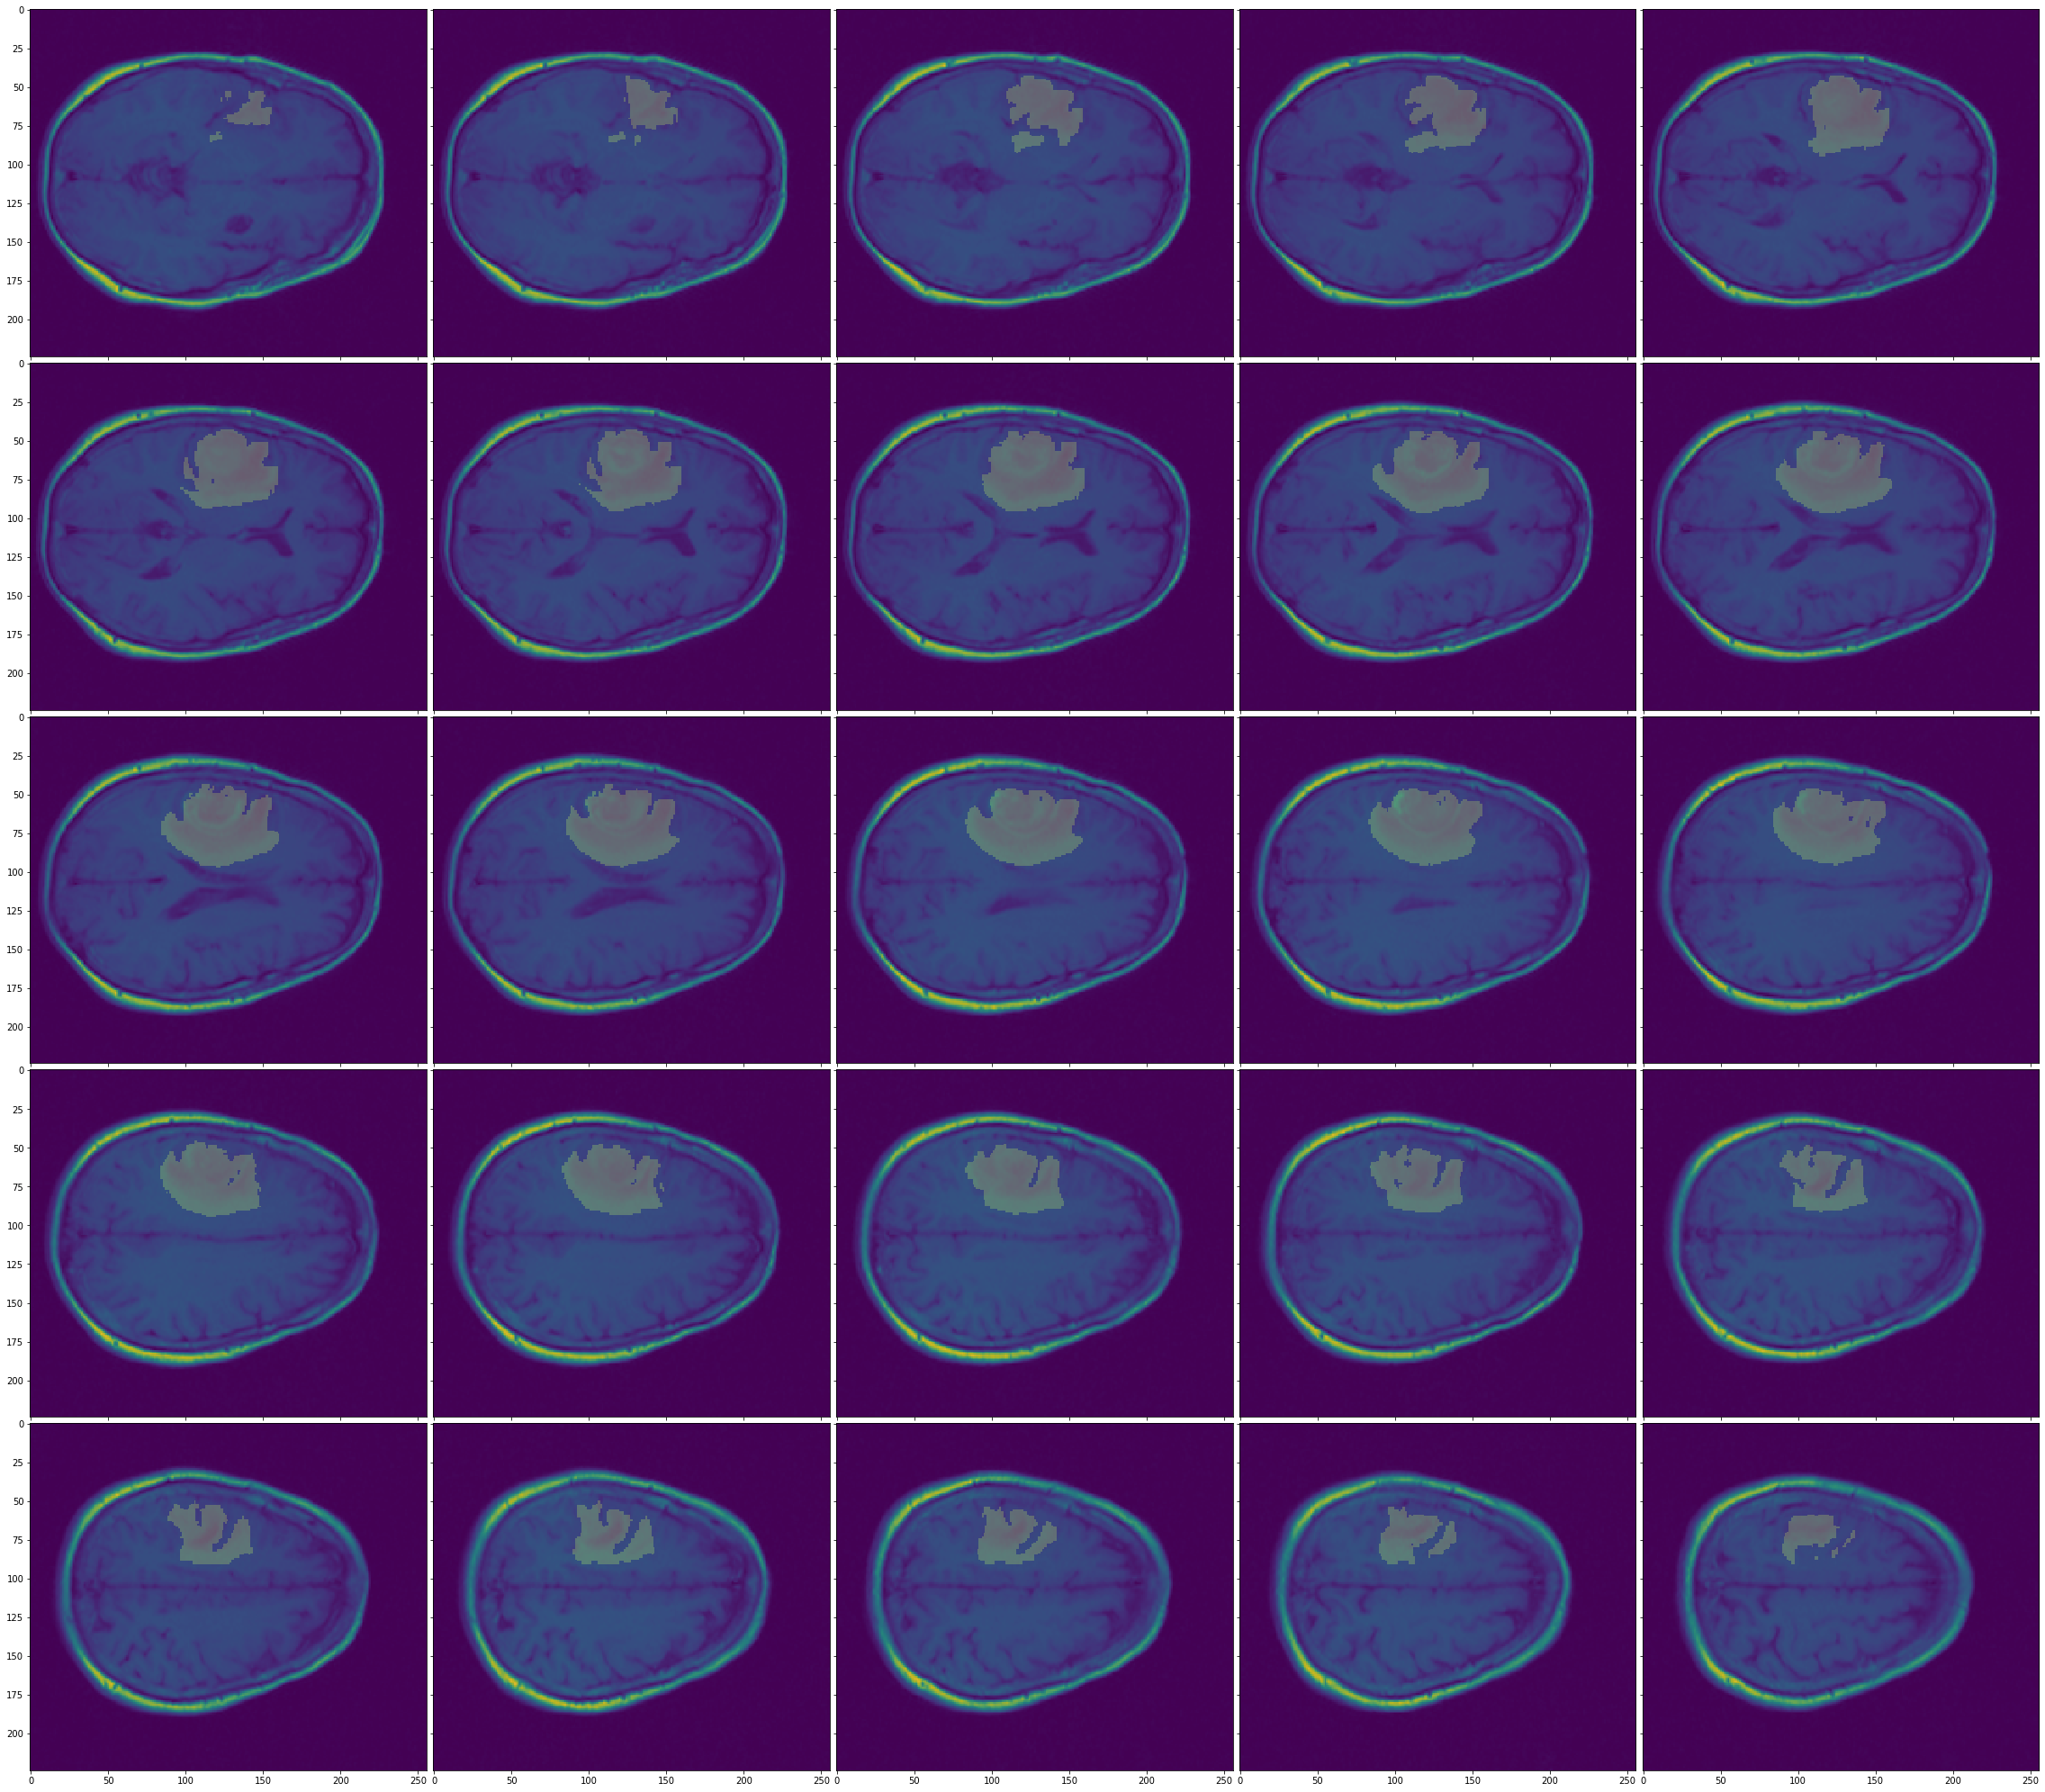

In [22]:
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid
import numpy as np
from nilearn.image import resample_to_img

s = Subject(subjects_dir, "ANGELONI_GIUSEPPINA")

t1 = s.get_sequence("T1")

roi = s.get_roi("T2ROI") # "T1") # , "T2ROI")

roi_resampled = resample_to_img(roi, t1, interpolation='nearest')

img = t1.dataobj

img_roi = roi_resampled.dataobj

fig = plt.figure(figsize=(40., 40.))

grid = ImageGrid(fig, 111,  # similar to subplot(111)
                 nrows_ncols=(5, 5),  # creates 2x2 grid of axes
                 axes_pad=0.1,  # pad between axes in inch.
                 )

((rmin, rmax), (cmin, cmax), (zmin, zmax)) = get_bounding_box(roi_resampled)

zcenter = int((zmax - zmin) / 2) + zmin

indexes = list(range(zcenter - 13, zcenter + 13))

for ax, im, im_roi in zip(grid, [img[:,:,z_slice] for z_slice in indexes], [img_roi[:,:,z_slice] for z_slice in indexes]):
    # Iterating over the grid returns the Axes.
    ax.imshow(im)
    ax.imshow(im_roi, alpha=0.2)

plt.show()

In [8]:
import nibabel as nib

"""
Generate a dataset.
For a given subject, sequence and mask, the method generate a 3D projection of the tumor with specified measures.
The file has the following name: <sequence>-<mask>-<side>.nii
"""
def generate_dataset(subjects_dir, dataset, prefix, sequence="T1", mask="T2ROI", side="32"):
    
    # Iterate over dataset subjects
    for i in range(dataset.shape[0]):
        
        subject_name = dataset.iloc[i, 1]

        # Load Subject proxy
        subject = Subject(subjects_dir, subject_name)
        
        print("Subject is", dataset.iloc[i, 1])

        # Label
        label = dataset.iloc[i, 2]

        try:

            # Destination dir
            dst = f"{prefix}/{subject_name}"

            os.makedirs(dst, exist_ok=True)

            # Get sequence
            seq = subject.get_sequence(sequence)

            # Extract roi
            roi = subject.get_roi(mask)

            # Resample roi to the sequence
            roi_resampled = resample_to_img(roi, seq, interpolation='nearest')

            # Extract volumetric roi from sequence and resize to a cube with that side
            resampled = mask_crop_resize(seq, roi, side)

            # Save it
            nib.save(resampled, f"{dst}/{sequence}-{mask}-{side}.nii.gz")

        except FileNotFoundError as e:
            print(e)
        except TypeError as e:
            print(e)
        except:
            print("Unexpected error:", sys.exc_info())
            print(f"Skipping subject {subject}: missing sequence {sequence}")

# Dataset creation

Now we generate the complete dataset of sequences T1, FLAIR, ADC

In [9]:
import pandas as pd

dataset = pd.read_csv(dataset_labels)

for sequence in ["T1", "FLAIR", "ADC"]:
    generate_dataset(
        "/data/RMN/LUCA_PASQUINI/DATI_SEGMENTATI_SCALATI_media/", 
        dataset, 
        "3d-dataset", 
        sequence, 
        "T2ROI", 
        32)

Subject is ALESSANDRINI_GLAUCO
Subject is ANGELONI_GIUSEPPINA
Subject is ASSANTO_MARIA
Subject is ASTA_G
No such file or no access: '/data/RMN/LUCA_PASQUINI/DATI_SEGMENTATI_SCALATI_media//ASTA_G/T1_registered.nii'
Subject is BAGNOLI_VINCENZO
Subject is BALZAMO_A
No such file or no access: '/data/RMN/LUCA_PASQUINI/DATI_SEGMENTATI_SCALATI_media//BALZAMO_A/T1_registered.nii'
Subject is BARONTINI_MARIA_GIOVANNA
Subject is BATTISTA_DOMENICA
Subject is BERGNACH_SILVANO
Subject is BERNOLA_TERESA
Subject is BERTUZZI_LUISA
Subject is BEVILACQUA_RITA
Subject is BIANCHI_GIOVANNI
Subject is BIANCHI_ORAZIO
Subject is BIANCHI_S
No such file or no access: '/data/RMN/LUCA_PASQUINI/DATI_SEGMENTATI_SCALATI_media//BIANCHI_S/T1_registered.nii'
Subject is BIAVATI_S
Subject is BOEZI_MARIO
Subject is BOVE_A
No such file or no access: '/data/RMN/LUCA_PASQUINI/DATI_SEGMENTATI_SCALATI_media//BOVE_A/T1_registered.nii'
Subject is CACACE_PAOLO
Subject is CALDARONI_ANNA
Subject is CAMACCI_FILIBERTO
Subject is CAMPL

Subject is COLETTA_MARIA
Subject is COSIMI_MASSIMO
Subject is COSTANZI_P
Subject is CRESCENZI_ARMANDO
Subject is DARIDA
Subject is DEL_BOVE_PIERINA
Subject is DE_PAOLI_R
Subject is DE_SANTIS_GIORGO
Subject is DIASPRO_G
Subject is DI_CARLATONIO_MAURIZIO
Subject is DI_LORENZO_TOMMASO
Subject is DI_MARCO_L
Subject is DI_MASO_SIMONE
Subject is DI_MASSA_SERGIO
Subject is DOBRISAN_DORINA
Subject is DROGHEI_SANDRO
Subject is D_ANGELI_ANNUNZIATA
Subject is D_ANGELO_RENATO
Subject is EMERY_R_C
Subject is FABIANI_ANNA
Subject is FEDERICO_FRANCESCO
Subject is FERRAZZA_RITA
Subject is FERRI_M_B
Subject is FILIPPONI_QUINTINO
Subject is FIUCCI_A
Subject is FLORIO_FRANCESCO_PAOLO
Subject is FRATINI_RITA
Subject is GATTAMORTA_NATALINA
Subject is GEGGI_GIULIO
Subject is GENNARI_CRISTIANO
Subject is GIACCHERINI_M
Subject is GIANFELICI_LUISA
Subject is GIOIA_COSMO_DAMIANO
Subject is GIORDANO_STEFANIA
Subject is INCITI_DONATA
Subject is IONTA_LUCIANA
Subject is ISMAIL_A
Subject is ISONI_FRANCESCO
Subject 

Subject is PALMIERI
Subject is PANETTI
Subject is PASCARELLA_P
Subject is PASSARI
Subject is PELUSO_A
Subject is PENNICCHI_R
Subject is PIERI
Subject is PIERINI_CATERINA
Subject is PINEDA_MARIA_ASSUNTA
Subject is PISTOIA_CARLO
Subject is PODAGROSI_TERESA
Subject is PODDA_ANTONINO
Subject is POMPEI_F
Subject is PRINCIPI_ANNA_MARIA
Subject is PROIETTI_GIOVANNI
Subject is PROIETTI_MARIA
Subject is QUACQUARELLI_A
Subject is QUATTROCIOCCHI_EVELINA
Subject is result-scalati.txt
No such file or no access: '/data/RMN/LUCA_PASQUINI/DATI_SEGMENTATI_SCALATI_media//result-scalati.txt/ADC_registered.nii'
Subject is result.txt
No such file or no access: '/data/RMN/LUCA_PASQUINI/DATI_SEGMENTATI_SCALATI_media//result.txt/ADC_registered.nii'
Subject is RE_ATTILIO
No such file or no access: '/data/RMN/LUCA_PASQUINI/DATI_SEGMENTATI_SCALATI_media//RE_ATTILIO/ROI/T2ROI.nii'
Subject is RICCI_ALESSANDRO
Subject is ROMITO_ORAZIO
Subject is RONZO_F
Subject is ROSARI_NANDO
Subject is RUSCITO_ELISABETTA
Subject 

# Test

Now I try to see some 3d tumor cube

In [10]:
import nibabel as nb

In [24]:
t1 = nb.load("3d-dataset/ALESSANDRINI_GLAUCO/T1-T2ROI-32.nii.gz")

In [25]:
from nilearn.plotting import plot_anat

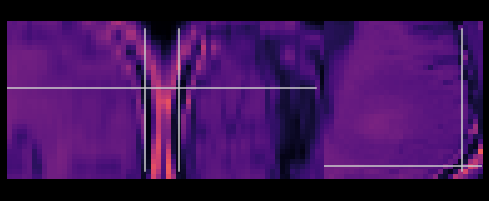

In [26]:
plot_anat(t1, cmap='magma', colorbar=False, display_mode="ortho", annotate=False);

/usr/local/lib/python3.6/dist-packages/nilearn/plotting/html_stat_map.py:83: UserWarning: Threshold given was 3, but the data has no values below 4.726412773132324. 
  data.min()))



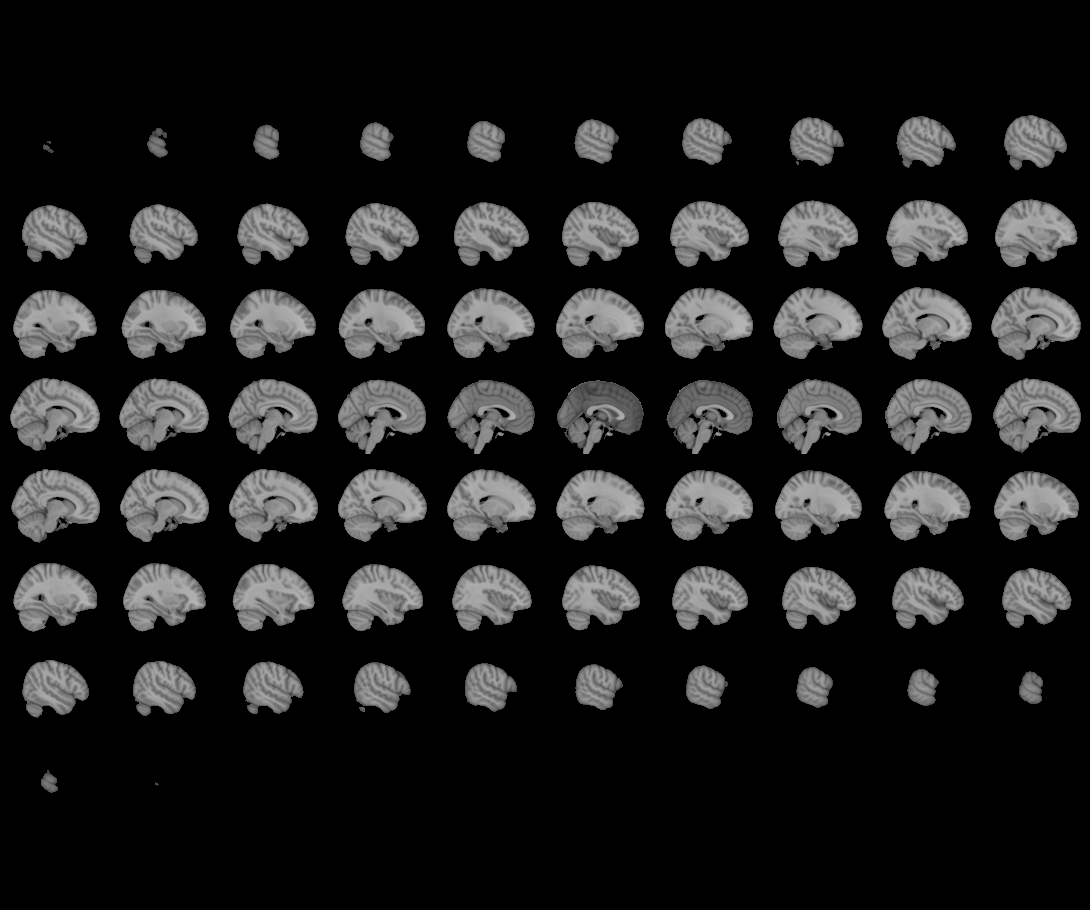
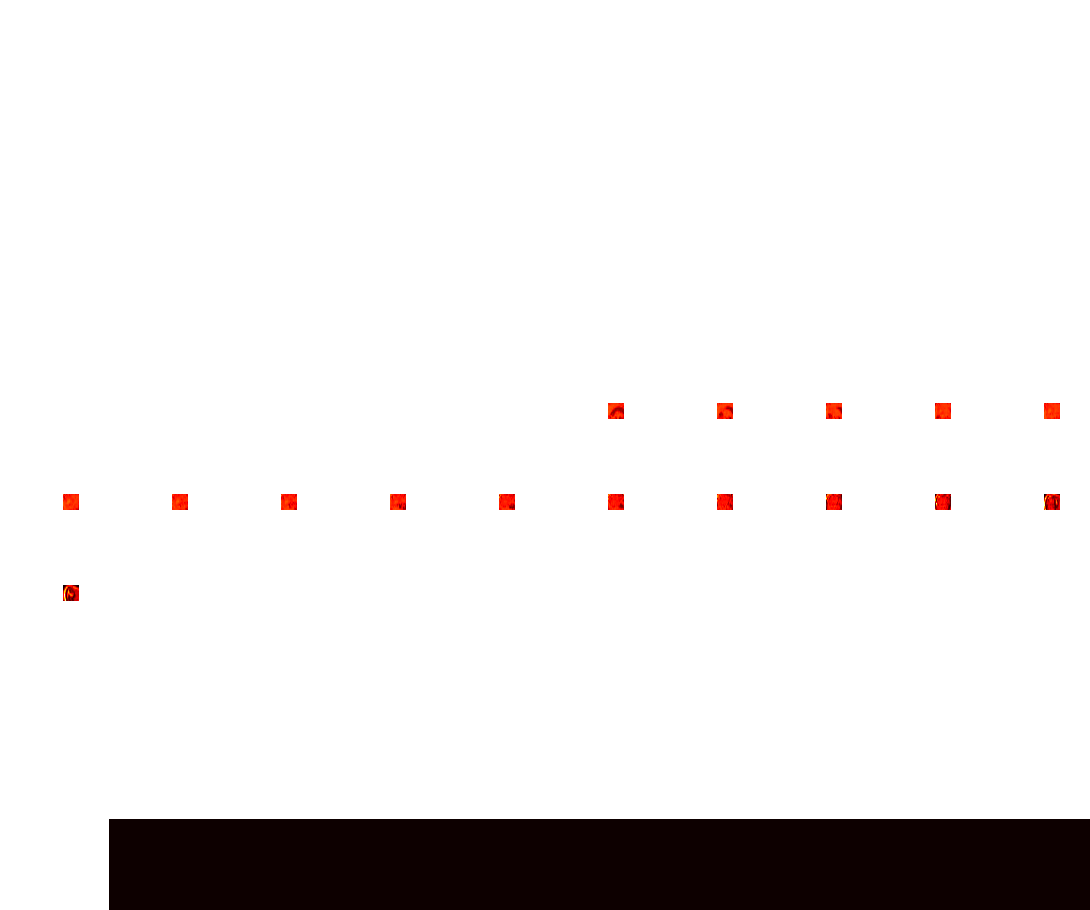

In [28]:
view = nilearn.plotting.view_img(t1, threshold=3)
# In a Jupyter notebook, if ``view`` is the output of a cell, it will
# be displayed below the cell
view

Plot sliced

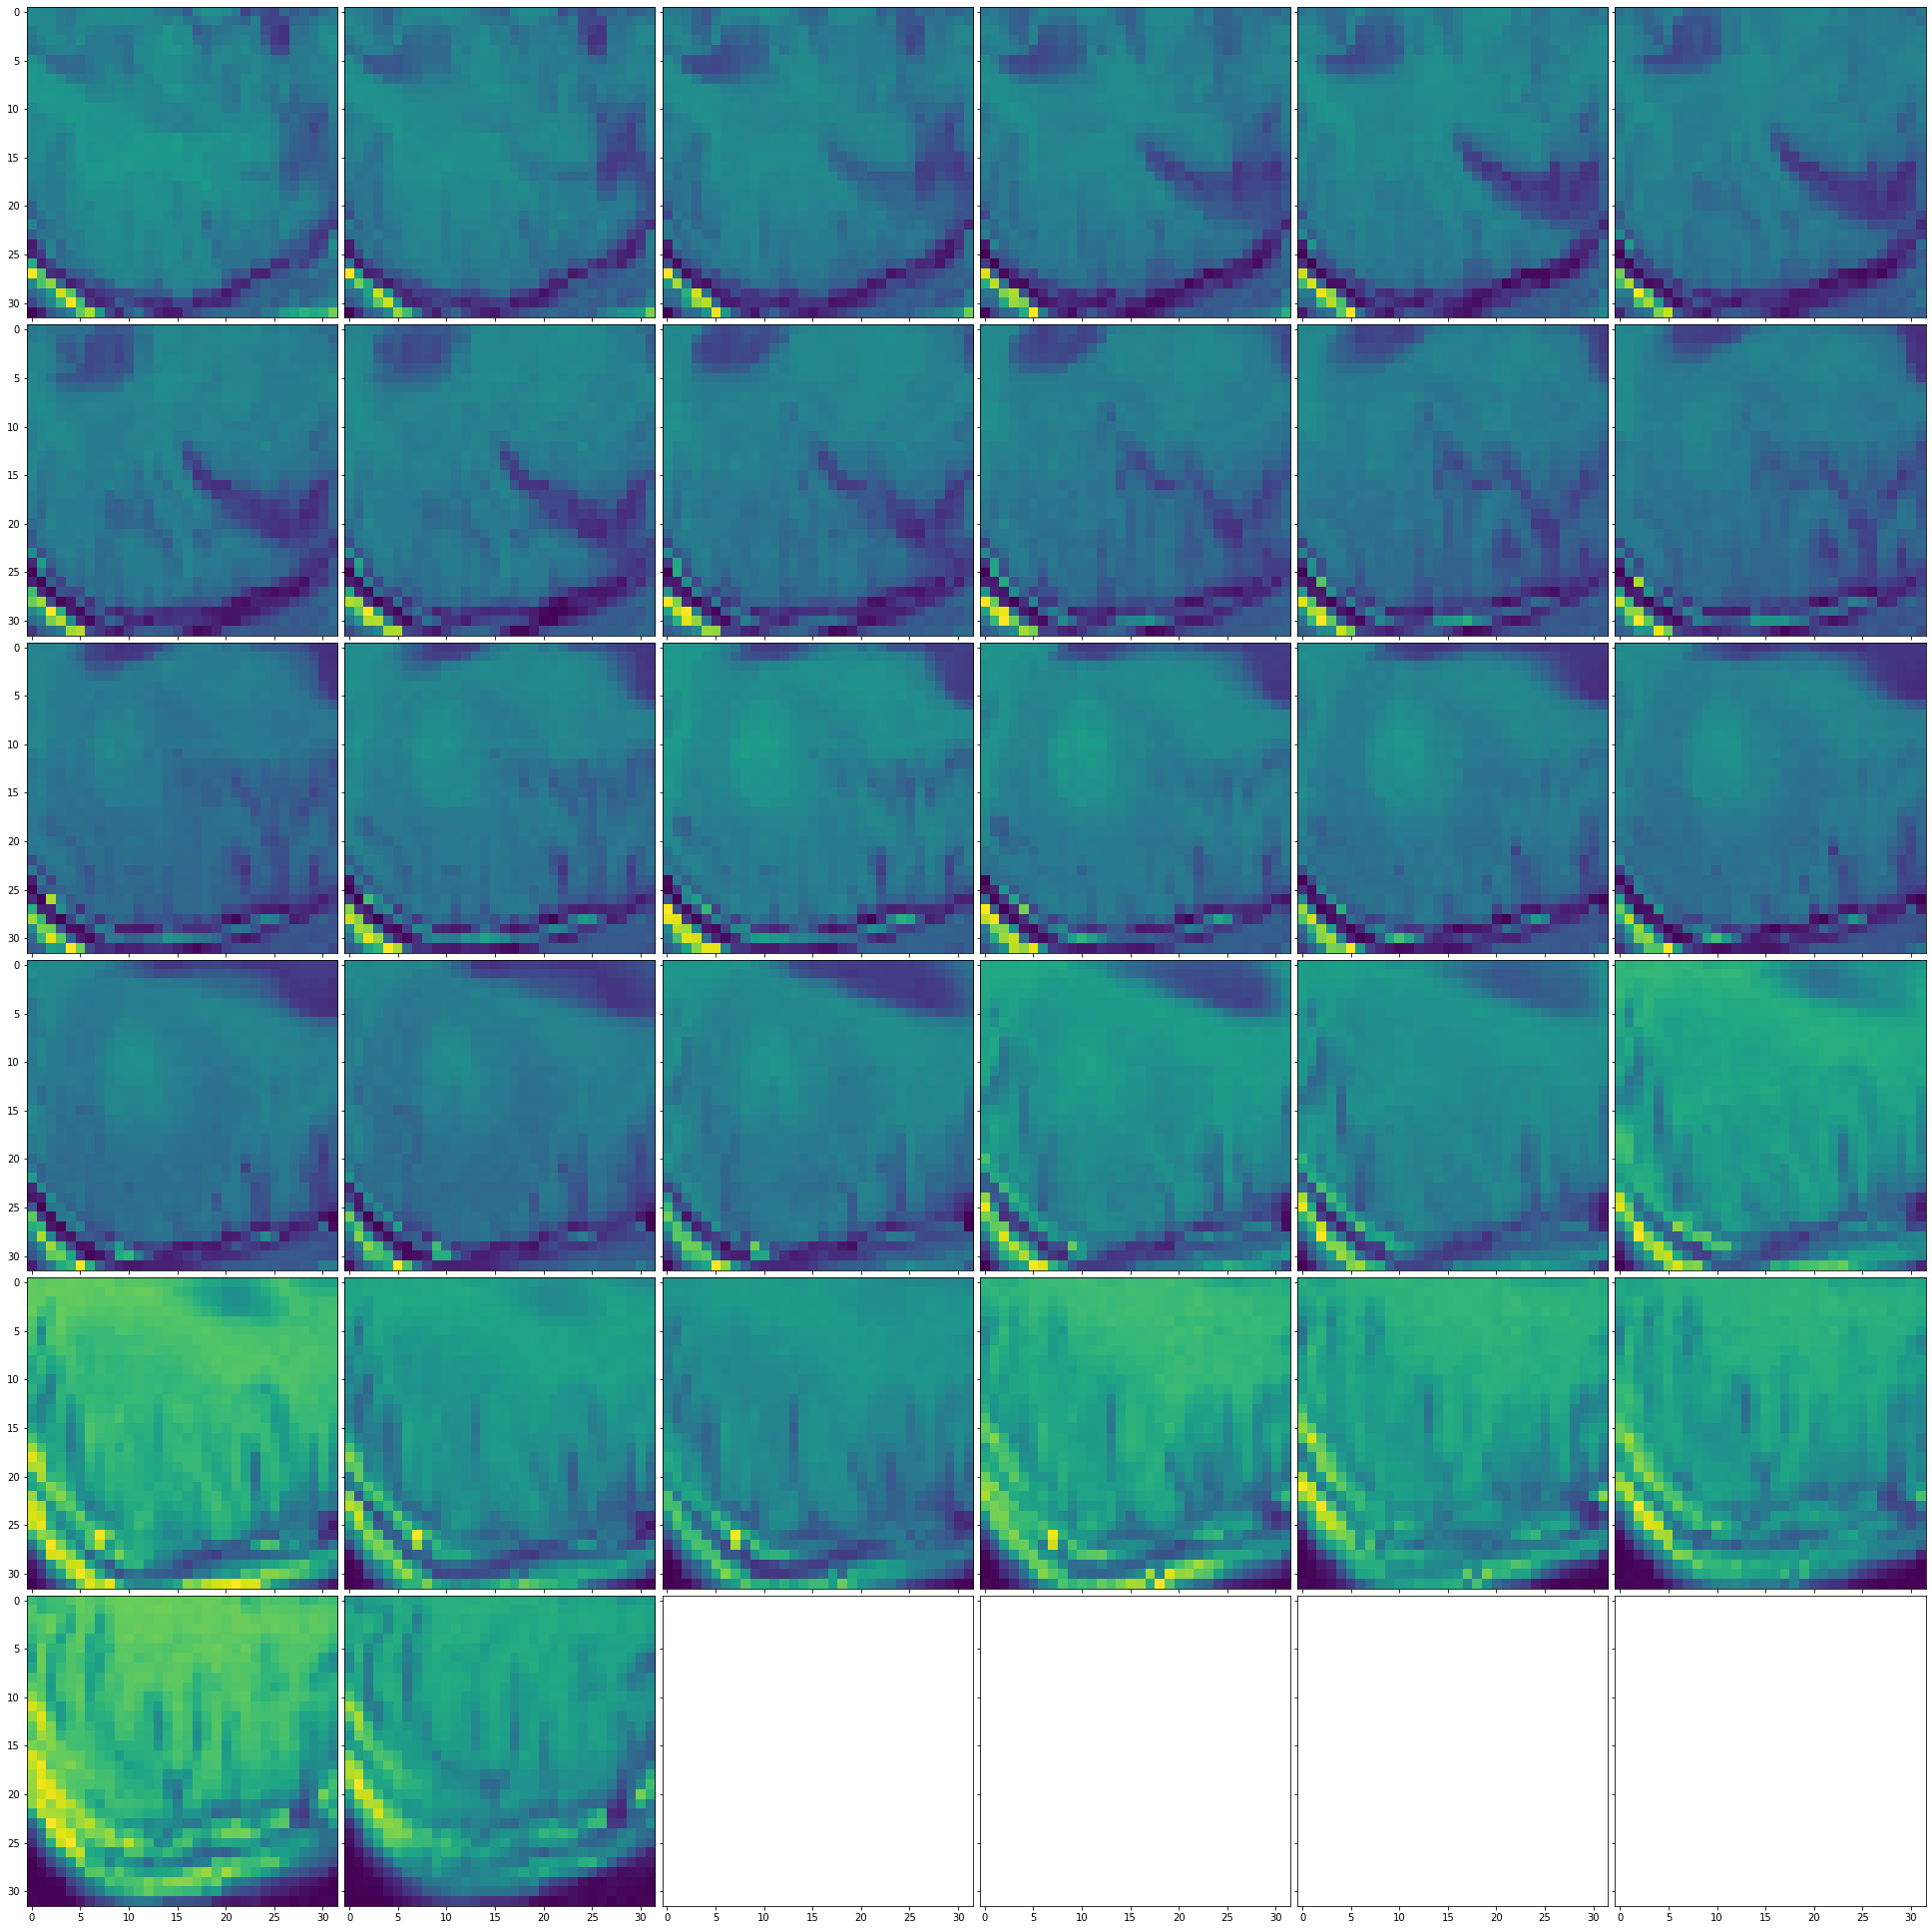

In [15]:
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid
import numpy as np

fig = plt.figure(figsize=(35., 35.))
grid = ImageGrid(fig, 111,  # similar to subplot(111)
                 nrows_ncols=(6, 6),  # creates 2x2 grid of axes
                 axes_pad=0.1,  # pad between axes in inch.
                 )

data = t1.dataobj

for ax, z_slice in zip(grid, range(t1.shape[2])):
    
        img = data[:,:,z_slice]
    
        ax.imshow(img)
        
plt.show()     